# Importação das Bibliotecas
Esta primeira cedula foi destinada a importação das bibliotecas utilizadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from ellolib import Perceptron

# Abertura dos dados
Dados no formato txt com conteúdo em binário descrevendo um numpy.ndarray

In [2]:
dados = np.fromfile('dataAll.txt').reshape((1000, 3))

## Repartição dos dados de treino e teste

In [3]:
#importante ressaltar que a cada execução os valores serão diferentes
training_idx = np.random.randint(dados.shape[0], size=700)
test_idx = np.random.randint(dados.shape[0], size=300)
training, test = dados[training_idx,:], dados[test_idx,:]


In [4]:
x_training = np.array((training[0:,:2]))
y_training = np.array((training[0:,-1]))

In [5]:
x_training

array([[-344.5323, -650.3941],
       [-871.3476, -866.8983],
       [ 787.4085,  105.6173],
       ...,
       [-882.0782, -639.5238],
       [  16.7904, -792.7902],
       [-591.1371,  963.7026]])

In [6]:
training

array([[-344.5323, -650.3941,    1.    ],
       [-871.3476, -866.8983,    0.    ],
       [ 787.4085,  105.6173,    1.    ],
       ...,
       [-882.0782, -639.5238,    0.    ],
       [  16.7904, -792.7902,    1.    ],
       [-591.1371,  963.7026,    0.    ]])

In [7]:
x_test = np.array((test[0:,:2]))
y_test = np.array((test[0:,-1]))

In [8]:
type(x_test)

numpy.ndarray

# Grafico

Text(0.5, 1.0, 'Problema linearmente separavel')

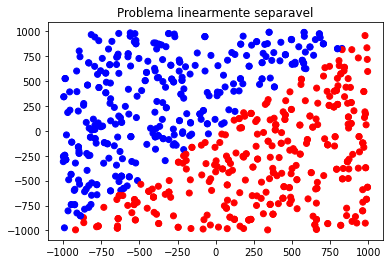

In [9]:

plt.scatter(training[:,1],training[:,0], c = y_training, cmap = mcolors.ListedColormap(["red", "blue"]))

plt.title("Problema linearmente separavel" )
#talvez ainda tenha correção no gráfico


Como pode se notar é um problema linearmente separavel

In [10]:
file = np.fromfile("./rna-2020.1-pp2-data/dataAll.txt")
file = file.reshape((int(file.shape[0] / 3), 3))

In [17]:
b = Perceptron(dataset= file)
b.fit()
print("## reta")
reta = b.generate_hyperplane()
print(b.x_training.shape[0])

------ Epoch 1 ------
### Weights [ 0.14547617 83.02996528 79.39195927]
### Weights [ 4.54761713e-02  1.35618495e+02 -1.92771007e+01]
### Weights [  0.14547617  95.60958528 -97.16979073]
### Weights [  0.24547617 145.07040528 -48.27574073]
### Weights [   0.34547617  105.52115528 -145.36978073]
### Weights [  0.44547617 197.76313528 -58.89721073]
### Weights [  0.54547617 185.86602528 -86.79675073]
### Weights [   0.64547617  157.65856528 -120.38087073]
### Weights [   0.54547617   92.96530528 -201.75200073]
### Weights [   0.64547617  131.33959528 -182.48800073]
### Weights [   0.74547617  201.53333528 -115.26232073]
### Weights [   0.64547617  137.24412528 -183.32695073]
### Weights [   0.74547617  202.23528528 -122.43527073]
### Weights [   0.64547617  151.30170528 -185.83524073]
### Weights [   0.54547617  227.28502528 -121.65557073]
### Weights [   0.44547617  163.17526528 -210.00127073]
### Weights [   0.54547617  250.31002528 -123.31144073]
### Weights [   0.64547617  198.394695

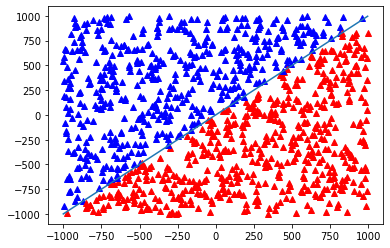

In [16]:
color = ['^b', '^r']

for point,y in zip(b.x_training, b.y_training):
    plt.plot(point[0], point[1], color[int(y)])

plt.plot(reta[0], reta[1])
